In [28]:
import pandas as pd 
import gc
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [35]:
gc.collect()

9011

In [37]:
df = pd.read_excel('./data/Arequipa.xlsx', engine='openpyxl', parse_dates=['date'])
df.head(3)

,date,region,cases,cumulative cases,calc deaths,deaths,cumulative deaths,total_tests,negative_tests,pcr_test_positive,serological_test_positive,ag_test_positive
0,2020-03-13,AREQUIPA,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-14,AREQUIPA,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-15,AREQUIPA,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2020-03-13 to 2022-04-05
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   region                     754 non-null    object 
 1   cases                      754 non-null    float64
 2   cumulative cases           754 non-null    float64
 3   calc deaths                754 non-null    float64
 4   deaths                     754 non-null    float64
 5   cumulative deaths          754 non-null    float64
 6   total_tests                754 non-null    float64
 7   negative_tests             754 non-null    float64
 8   pcr_test_positive          754 non-null    float64
 9   serological_test_positive  754 non-null    float64
 10  ag_test_positive           754 non-null    float64
dtypes: float64(10), object(1)
memory usage: 70.7+ KB


<AxesSubplot:xlabel='date'>

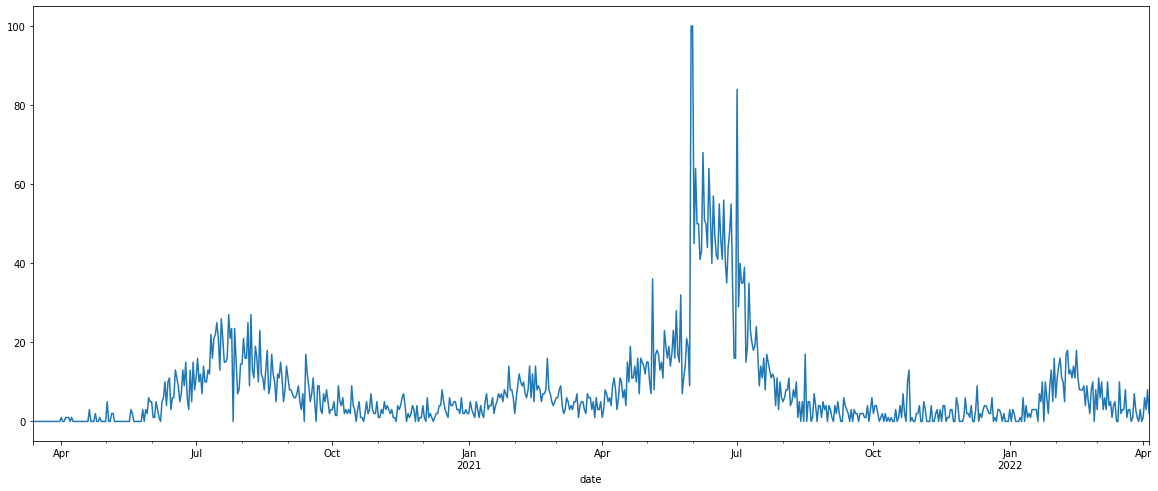

In [23]:
df['deaths'].plot(figsize=(20, 8))

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
res = adfuller(df['deaths'])
print(res[1])

0.052680775399843116


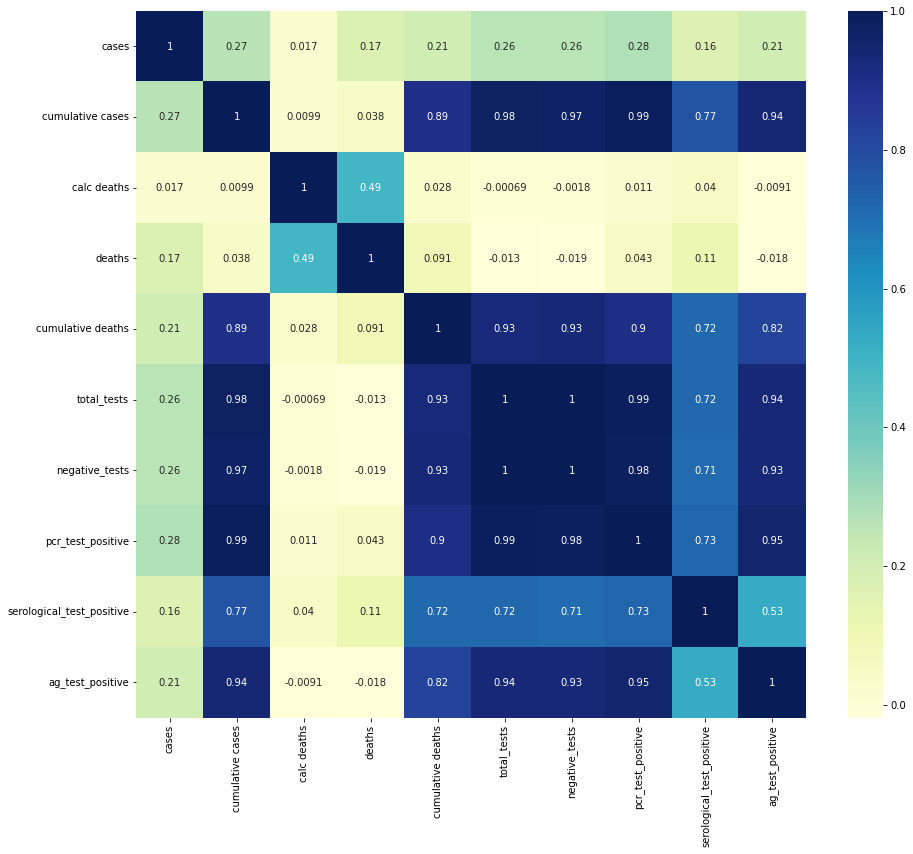

In [30]:
plt.figure(figsize=(15, 13))
dat = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

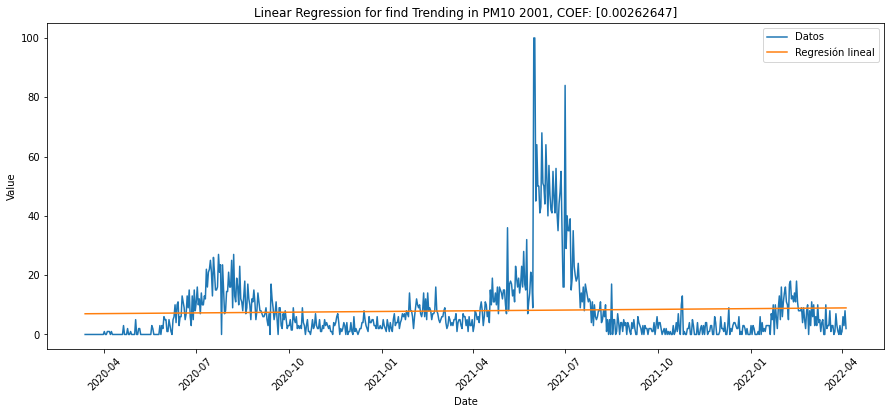

In [32]:
from sklearn.linear_model import LinearRegression

fechas = df.index.to_numpy()
valores = df['deaths'].to_numpy()

fechas_num = np.arange(len(fechas)).reshape(-1, 1)

regresion = LinearRegression()

regresion.fit(fechas_num, valores)

prediccion = regresion.predict(fechas_num)

plt.figure(figsize=(15, 6))
plt.plot(fechas, valores, label='Datos')
plt.plot(fechas, prediccion, label='Regresión lineal')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'Linear Regression for find Trending in PM10 2001, COEF: {regresion.coef_}')
plt.legend()
plt.xticks(rotation=45)
plt.show()

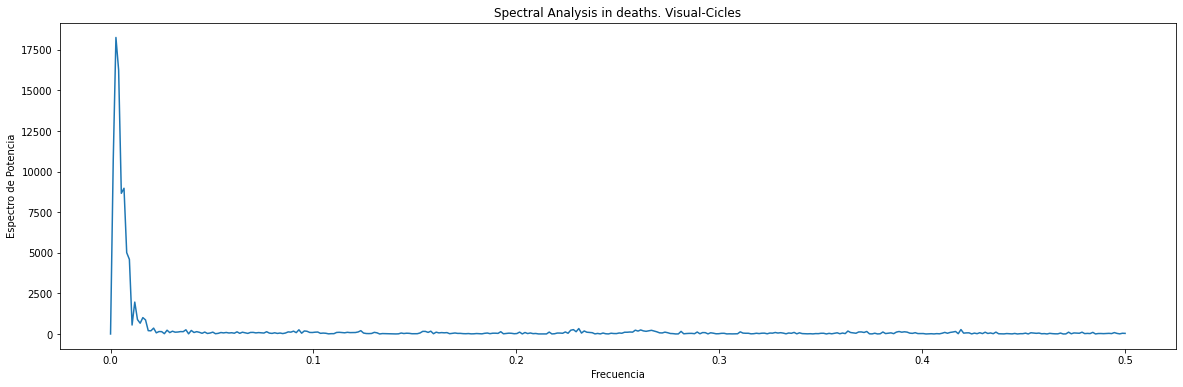

In [33]:
from scipy import signal

# Aplicar la transformada de Fourier a la serie temporal
frecuencias, espectro = signal.periodogram(df['deaths'])

# Visualizar el espectro de potencia
plt.figure(figsize=(20, 6))
plt.plot(frecuencias, espectro)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title(f'Spectral Analysis in deaths. Visual-Cicles')
plt.show()

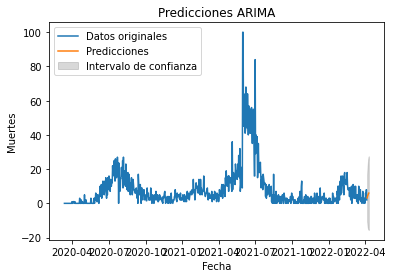

In [42]:
# Ajustar el modelo ARIMA
model = ARIMA(df['deaths'], order=(1, 0, 0))
model_fit = model.fit() 

# Realizar la predicción para los próximos 5 días
forecast = model_fit.get_forecast(steps=5)

# Obtener los valores predichos y los intervalos de confianza
forecast_values = forecast.predicted_mean
lower_conf_int = forecast.conf_int()['lower deaths']
upper_conf_int = forecast.conf_int()['upper deaths']

# Crear un índice de fechas para las predicciones
last_date = df['date'].max()
forecast_dates = pd.date_range(start=last_date, periods=len(forecast_values) + 1)[1:]

# Graficar los datos originales y las predicciones
plt.plot(df['date'], df['deaths'], label='Datos originales')
plt.plot(forecast_dates, forecast_values, label='Predicciones')
plt.fill_between(forecast_dates, lower_conf_int, upper_conf_int, alpha=0.3, color='gray', label='Intervalo de confianza')
plt.xlabel('Fecha')
plt.ylabel('Muertes')
plt.title('Predicciones ARIMA')
plt.legend()
plt.show()